<a href="https://colab.research.google.com/github/Fatikah002/PCVK_Fatikah/blob/main/Week5_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D-1 Percobaan Praktikum

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import cv2 as cv
from google.colab.patches import display
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

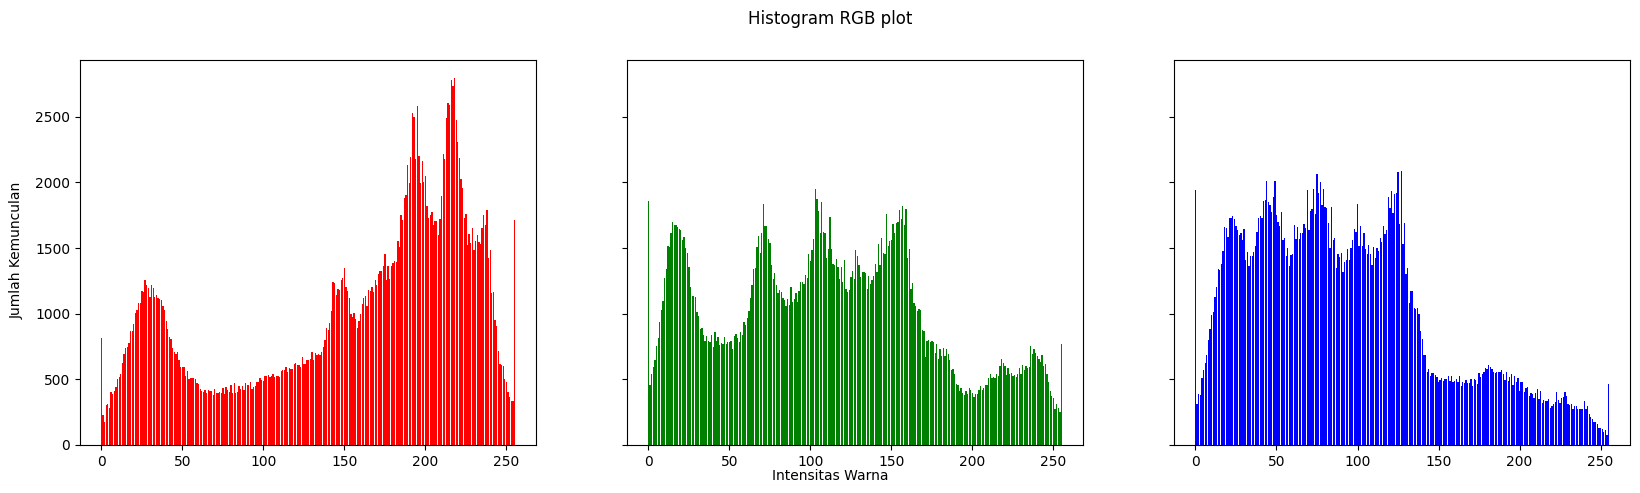

In [7]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red   = [0]* 256
green = [0]* 256
blue  = [0]* 256

for y in range(0, height) :
  for x in range(0, width) :
    red   [img[y][x][0]] += 1
    green [img[y][x][1]] += 1
    blue  [img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')
plt.show()


### Pertanyaan Praktikum D1

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?
2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

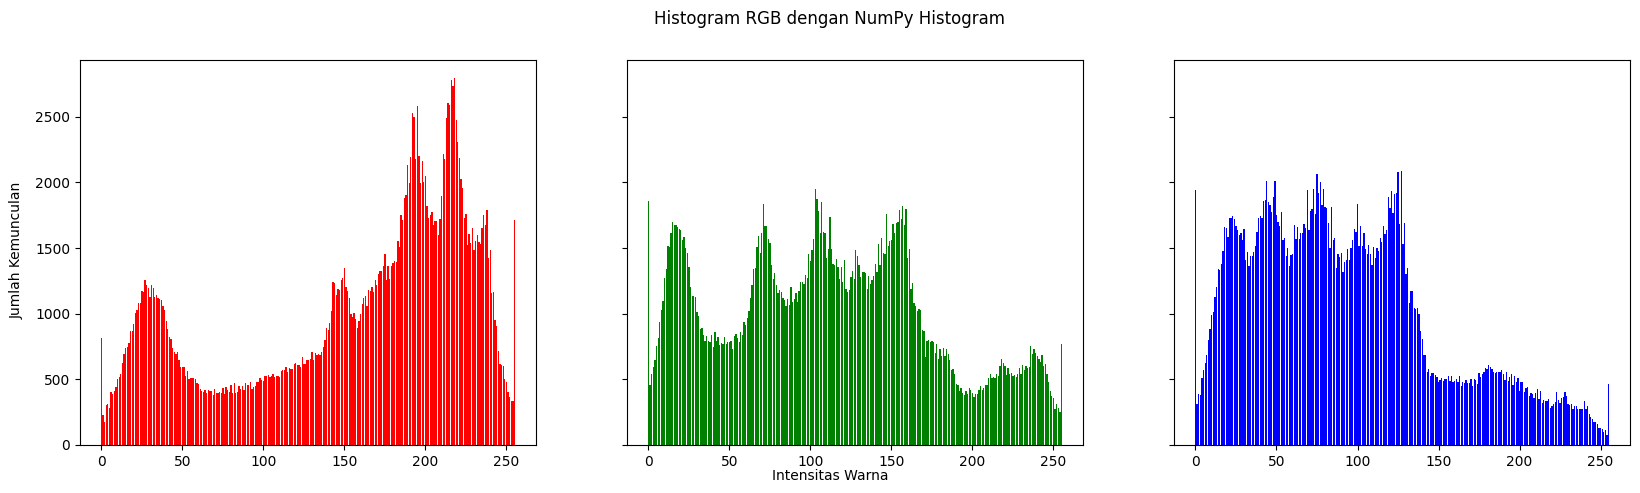

In [8]:
#1
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


red   = img[:, :, 0].ravel()
green = img[:, :, 1].ravel()
blue  = img[:, :, 2].ravel()

red_hist, _   = np.histogram(red, bins=256, range=(0, 256))
green_hist, _ = np.histogram(green, bins=256, range=(0, 256))
blue_hist, _  = np.histogram(blue, bins=256, range=(0, 256))

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB dengan NumPy Histogram')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red_hist, color='red')
axs[1].bar(names, green_hist, color='green')
axs[2].bar(names, blue_hist, color='blue')
plt.show()


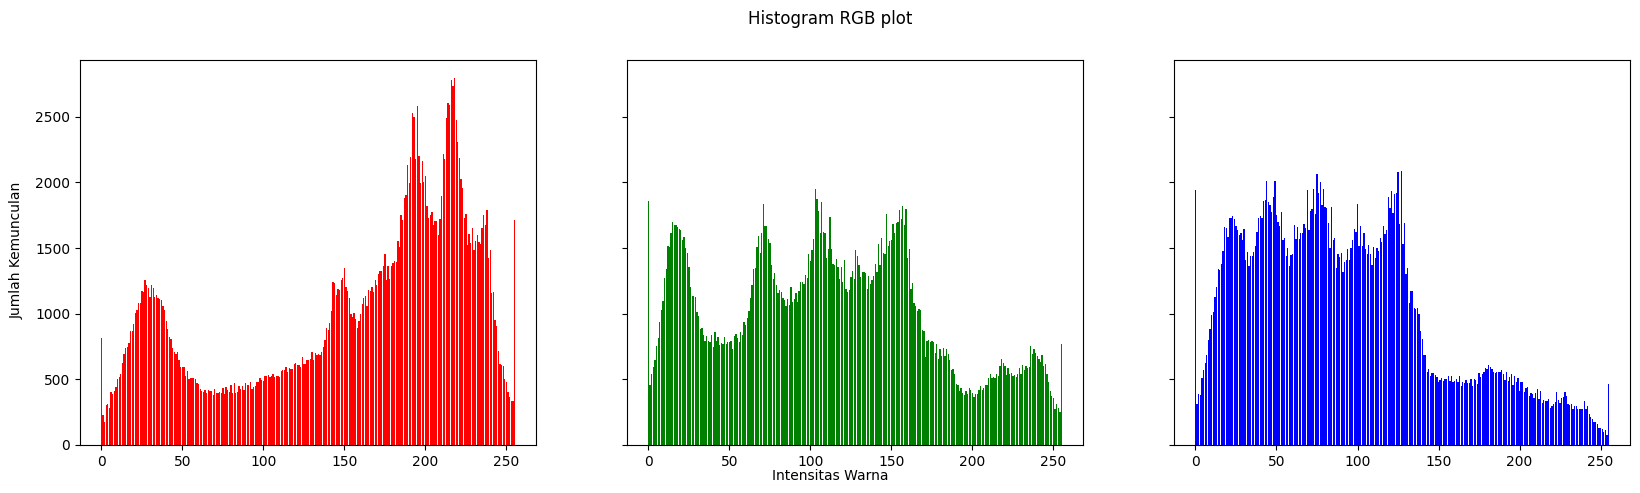

In [9]:
#2
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red   = [0]* 256
green = [0]* 256
blue  = [0]* 256

for y in range(0, height) :
  for x in range(0, width) :
    red   [img[y][x][0]] += 1
    green [img[y][x][1]] += 1
    blue  [img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')
plt.show()

# D-2 Percobaan Histogram Equalization


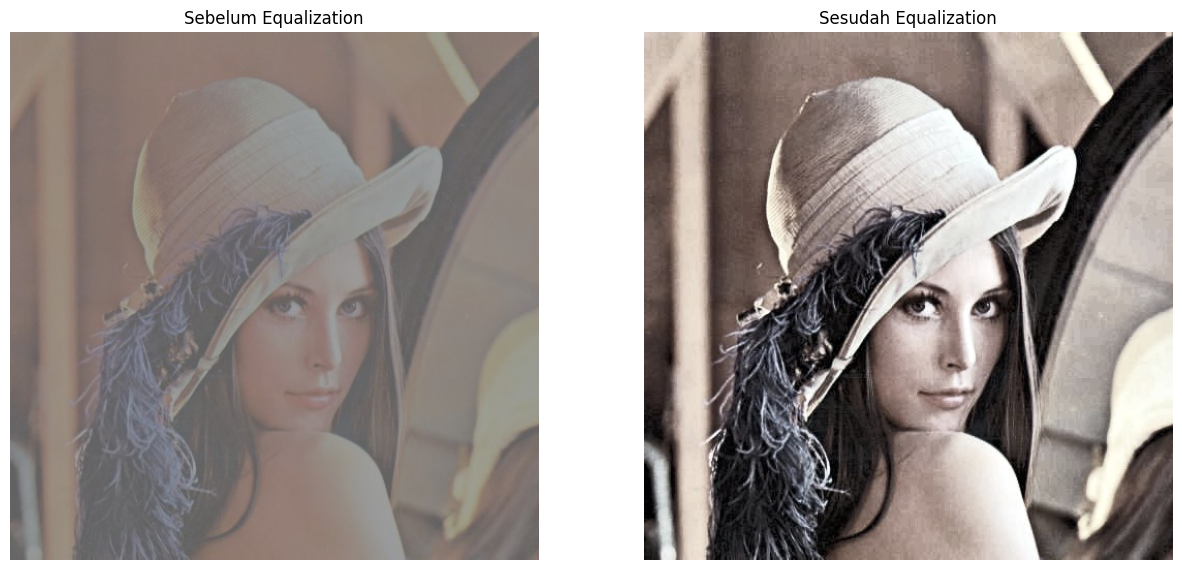

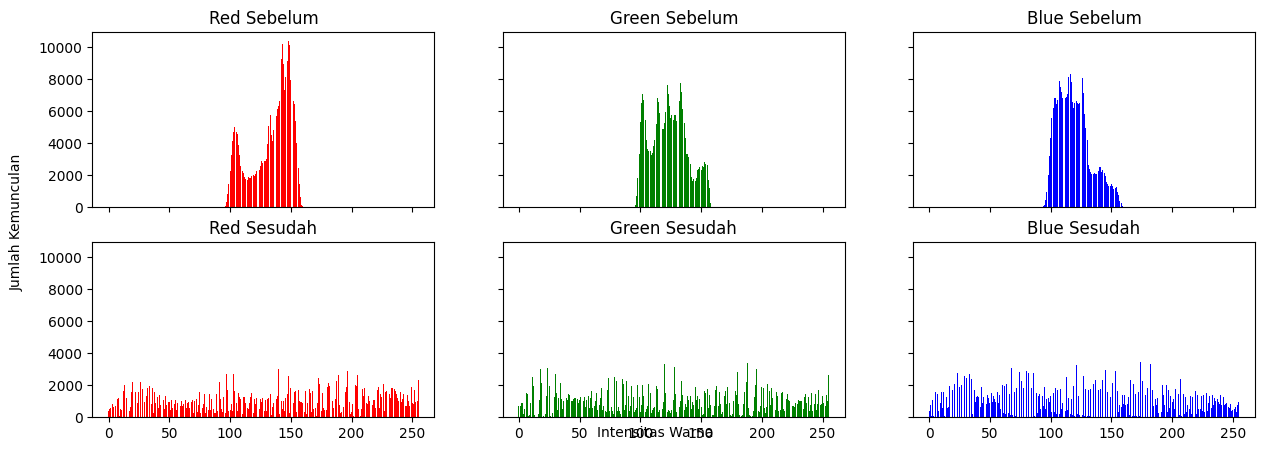

In [10]:

# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = img.shape
total_pixels = height * width

# Konversi ke YUV untuk mengambil channel Y (luminance)
img_yuv = cv.cvtColor(img, cv.COLOR_RGB2YUV)
Y_channel = img_yuv[:,:,0]

# Hitung histogram Y channel
hist_Y = np.zeros(256)
for y in range(height):
    for x in range(width):
        hist_Y[Y_channel[y, x]] += 1

# Hitung probabilitas warna (p_i)
prob_Y = hist_Y / total_pixels

# Hitung cumulative distribution function (CDF)
cdf_Y = np.cumsum(prob_Y)

# Hitung nilai transformasi s_k
L = 256
s_k = np.round((L-1) * cdf_Y).astype(np.uint8)

# Buat gambar equalized dengan transformasi s_k
Y_eq = np.zeros_like(Y_channel)
for y in range(height):
    for x in range(width):
        Y_eq[y, x] = s_k[Y_channel[y, x]]

# Gabungkan Y_eq dengan UV untuk membentuk gambar hasil
img_yuv_eq = img_yuv.copy()
img_yuv_eq[:,:,0] = Y_eq
img_eq = cv.cvtColor(img_yuv_eq, cv.COLOR_YUV2RGB)

# Histogram sebelum equalization
red = [0]*256
green = [0]*256
blue = [0]*256
for y in range(height):
    for x in range(width):
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

# Histogram sesudah equalization
red_eq = [0]*256
green_eq = [0]*256
blue_eq = [0]*256
for y in range(height):
    for x in range(width):
        red_eq[img_eq[y][x][0]] += 1
        green_eq[img_eq[y][x][1]] += 1
        blue_eq[img_eq[y][x][2]] += 1

# Tampilkan gambar sebelum & sesudah equalization
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=[15,7])
ax1.imshow(img)
ax1.set_title("Sebelum Equalization")
ax1.axis("off")
ax2.imshow(img_eq)
ax2.set_title("Sesudah Equalization")
ax2.axis("off")

# Plot histogram
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[15,5], sharex=True, sharey=True)
fig.text(0.07, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.07, 'Intensitas Warna', ha='center')

# Histogram sebelum
axs[0,0].bar(names, red, color='red')
axs[0,0].set_title("Red Sebelum")
axs[0,1].bar(names, green, color='green')
axs[0,1].set_title("Green Sebelum")
axs[0,2].bar(names, blue, color='blue')
axs[0,2].set_title("Blue Sebelum")

# Histogram sesudah
axs[1,0].bar(names, red_eq, color='red')
axs[1,0].set_title("Red Sesudah")
axs[1,1].bar(names, green_eq, color='green')
axs[1,1].set_title("Green Sesudah")
axs[1,2].bar(names, blue_eq, color='blue')
axs[1,2].set_title("Blue Sesudah")

plt.show()

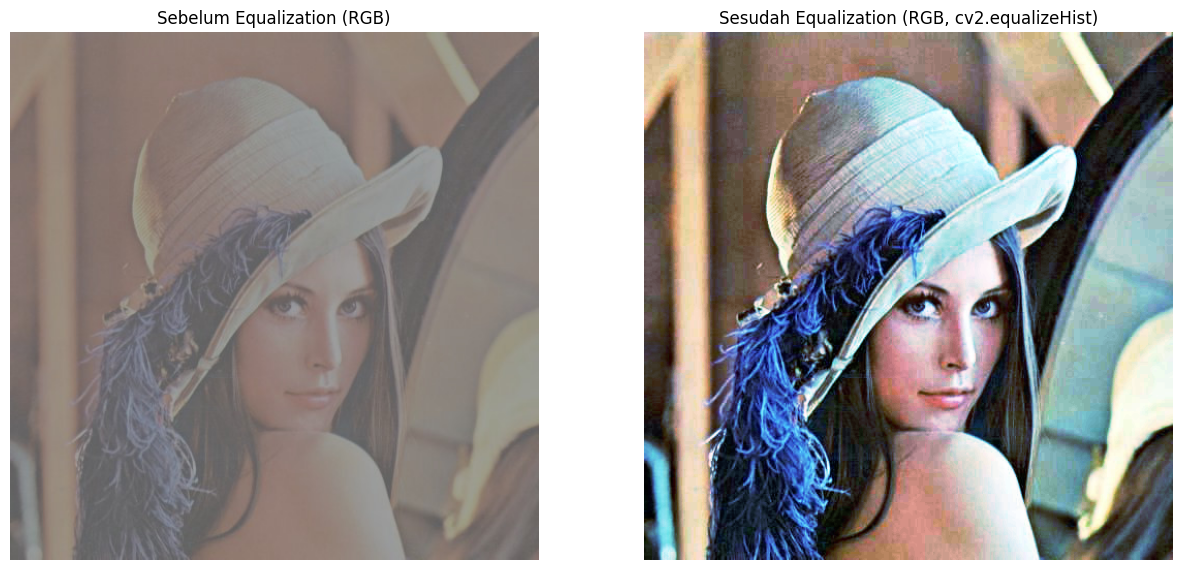

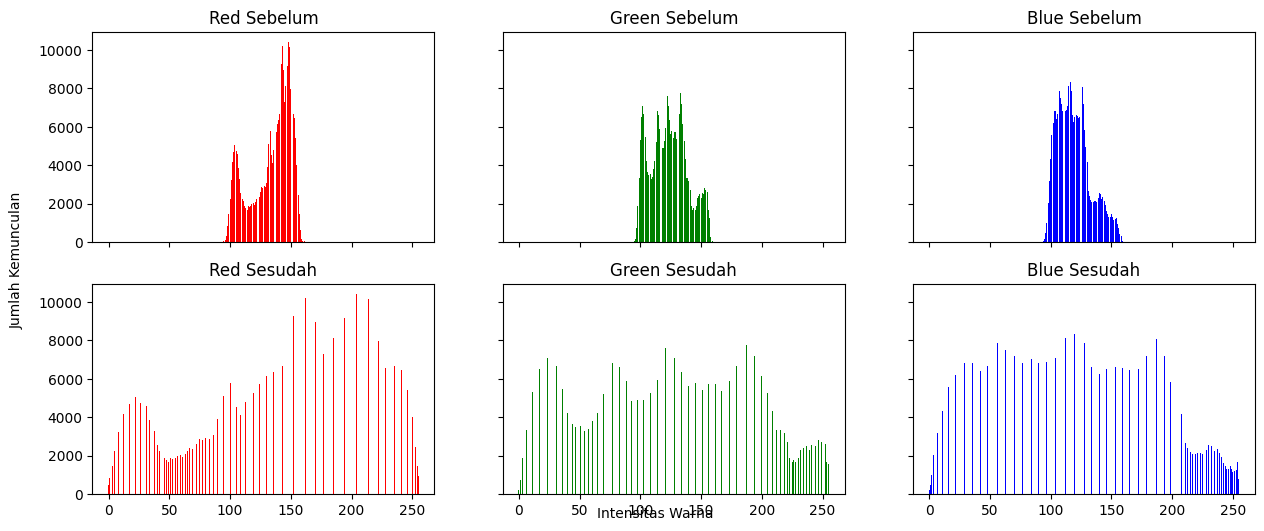

In [11]:
# --- Baca gambar ---
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# --- Split channel ---
r, g, b = cv.split(img)

# --- Equalization per channel ---
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# --- Merge hasil equalization ---
img_eq = cv.merge((r_eq, g_eq, b_eq))

# --- Histogram sebelum equalization ---
names = np.arange(256)
red = cv.calcHist([img],[0],None,[256],[0,256]).flatten()
green = cv.calcHist([img],[1],None,[256],[0,256]).flatten()
blue = cv.calcHist([img],[2],None,[256],[0,256]).flatten()

# --- Histogram sesudah equalization ---
red_eq = cv.calcHist([img_eq],[0],None,[256],[0,256]).flatten()
green_eq = cv.calcHist([img_eq],[1],None,[256],[0,256]).flatten()
blue_eq = cv.calcHist([img_eq],[2],None,[256],[0,256]).flatten()

# --- Tampilkan gambar ---
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,7])
ax1.imshow(img)
ax1.set_title("Sebelum Equalization (RGB)")
ax1.axis("off")
ax2.imshow(img_eq)
ax2.set_title("Sesudah Equalization (RGB, cv2.equalizeHist)")
ax2.axis("off")
plt.show()

# --- Tampilkan histogram dengan bar ---
fig, axs = plt.subplots(2, 3, figsize=[15,6], sharex=True, sharey=True)
fig.text(0.07, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.07, 'Intensitas Warna', ha='center')

# Histogram sebelum
axs[0,0].bar(names, red, color='red');   axs[0,0].set_title("Red Sebelum")
axs[0,1].bar(names, green, color='green'); axs[0,1].set_title("Green Sebelum")
axs[0,2].bar(names, blue, color='blue');  axs[0,2].set_title("Blue Sebelum")

# Histogram sesudah
axs[1,0].bar(names, red_eq, color='red');   axs[1,0].set_title("Red Sesudah")
axs[1,1].bar(names, green_eq, color='green'); axs[1,1].set_title("Green Sesudah")
axs[1,2].bar(names, blue_eq, color='blue');  axs[1,2].set_title("Blue Sesudah")

plt.show()

# Pertanyaan Praktikum D2

1. Perbandingan Citra Lena
* Gunakan hasil histogram equalization pada citra lena.jpg.
* Hitung nilai PSNR antara citra asli dan citra hasil equalization.
* Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas
visual citra? Apakah ada detail baru yang muncul setelah equalization?
 Jawab :

 Nilai PSNR = 12,66 dB tergolong rendah, artinya citra hasil equalization berbeda signifikan dari citra asli.

 Kualitas visual: tetap bagus karena kontras meningkat, membuat citra lebih jelas.

 Detail baru: area gelap/terang sebelumnya homogen kini terlihat lebih jelas, tekstur dan objek halus lebih menonjol.

In [12]:
# Hitung nilai PSNR antara citra asli dan citra hasil equalization.
psnr_value = cv.PSNR(img, img_eq)
print("PSNR antara citra asli dan hasil equalization:", psnr_value)

PSNR antara citra asli dan hasil equalization: 12.662449451417581


2. Gunakan Citra KTM Lama.jpg
* Terapkan histogram equalization pada citra KTM lama.jpg.
* Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
dalam satu layout.
* Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

Jawab :
Perbandingan Sebelum & Sesudah Histogram Equalization

* Wajah: sebelum agak kurang jelas; sesudah lebih jelas, detail rambut dan pakaian menonjol.

* Teks (nama, NIM, jurusan, alamat): sebelumnya agak pudar; sesudah lebih kontras dan mudah dibaca.

* Latar belakang: sebelum terlihat flat; sesudah gradien lebih merata, area gelap/terang lebih jelas.

* Warna: tetap alami karena hanya luminance yang diubah.

* Histogram: sebelumnya intensitas menumpuk; sesudah distribusi lebih merata, kontras meningkat.

* Kualitas informasi: detail lebih jelas, informasi penting mudah dibaca; citra sedikit lebih “keras” tapi positif untuk dokumen.

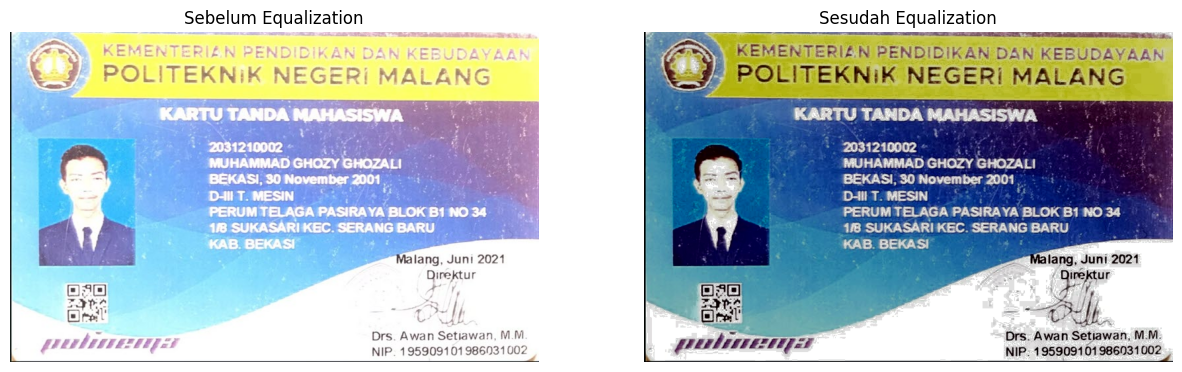

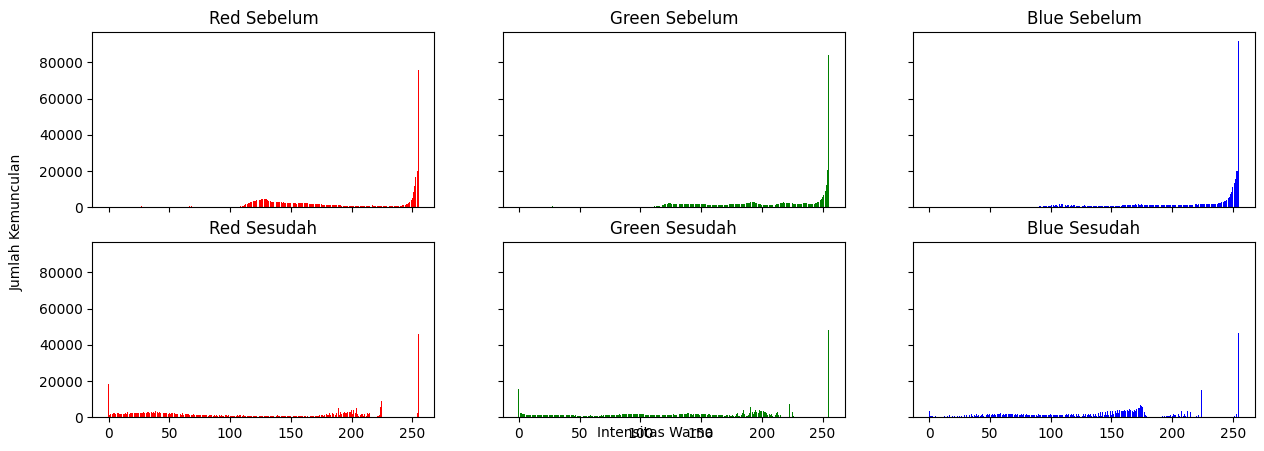

In [13]:
# Terapkan histogram equalization pada citra KTM lama.jpg.
# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTM lama.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = img.shape
total_pixels = height * width

# Konversi ke YUV untuk mengambil channel Y (luminance)
img_yuv = cv.cvtColor(img, cv.COLOR_RGB2YUV)
Y_channel = img_yuv[:,:,0]

# Hitung histogram Y channel
hist_Y = np.zeros(256)
for y in range(height):
    for x in range(width):
        hist_Y[Y_channel[y, x]] += 1

# Hitung probabilitas warna (p_i)
prob_Y = hist_Y / total_pixels

# Hitung cumulative distribution function (CDF)
cdf_Y = np.cumsum(prob_Y)

# Hitung nilai transformasi s_k
L = 256
s_k = np.round((L-1) * cdf_Y).astype(np.uint8)

# Buat gambar equalized dengan transformasi s_k
Y_eq = np.zeros_like(Y_channel)
for y in range(height):
    for x in range(width):
        Y_eq[y, x] = s_k[Y_channel[y, x]]

# Gabungkan Y_eq dengan UV untuk membentuk gambar hasil
img_yuv_eq = img_yuv.copy()
img_yuv_eq[:,:,0] = Y_eq
img_eq = cv.cvtColor(img_yuv_eq, cv.COLOR_YUV2RGB)

# Histogram sebelum equalization
red = [0]*256
green = [0]*256
blue = [0]*256
for y in range(height):
    for x in range(width):
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

# Histogram sesudah equalization
red_eq = [0]*256
green_eq = [0]*256
blue_eq = [0]*256
for y in range(height):
    for x in range(width):
        red_eq[img_eq[y][x][0]] += 1
        green_eq[img_eq[y][x][1]] += 1
        blue_eq[img_eq[y][x][2]] += 1

# Tampilkan gambar sebelum & sesudah equalization
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=[15,7])
ax1.imshow(img)
ax1.set_title("Sebelum Equalization")
ax1.axis("off")
ax2.imshow(img_eq)
ax2.set_title("Sesudah Equalization")
ax2.axis("off")

# Plot histogram
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[15,5], sharex=True, sharey=True)
fig.text(0.07, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.07, 'Intensitas Warna', ha='center')

# Histogram sebelum
axs[0,0].bar(names, red, color='red')
axs[0,0].set_title("Red Sebelum")
axs[0,1].bar(names, green, color='green')
axs[0,1].set_title("Green Sebelum")
axs[0,2].bar(names, blue, color='blue')
axs[0,2].set_title("Blue Sebelum")

# Histogram sesudah
axs[1,0].bar(names, red_eq, color='red')
axs[1,0].set_title("Red Sesudah")
axs[1,1].bar(names, green_eq, color='green')
axs[1,1].set_title("Green Sesudah")
axs[1,2].bar(names, blue_eq, color='blue')
axs[1,2].set_title("Blue Sesudah")

plt.show()

# D-3 Tugas Praktikum Dithering

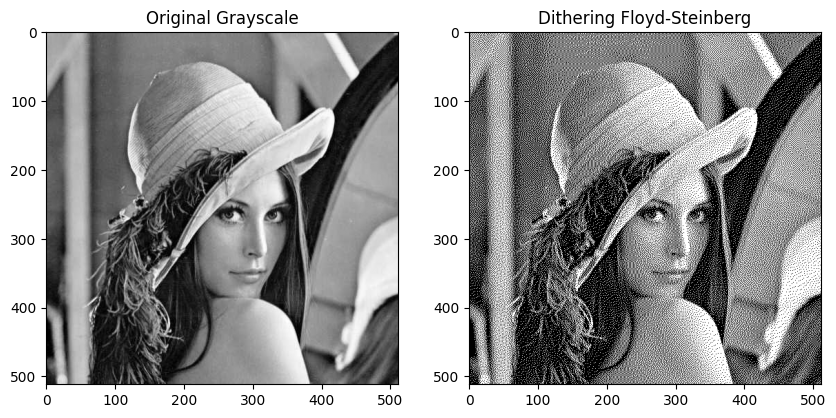

In [20]:
# 1.
# Load image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi ke grayscale

def floyd_steinberg_dithering(image):
    h, w = image.shape
    img = image.astype(float)
    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = 0 if old_pixel < 128 else 255   # threshold biner
            img[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x + 1 < w:
                img[y, x+1] = np.clip(img[y, x+1] + error * 7/16, 0, 255)
            if y + 1 < h and x > 0:
                img[y+1, x-1] = np.clip(img[y+1, x-1] + error * 3/16, 0, 255)
            if y + 1 < h:
                img[y+1, x] = np.clip(img[y+1, x] + error * 5/16, 0, 255)
            if y + 1 < h and x + 1 < w:
                img[y+1, x+1] = np.clip(img[y+1, x+1] + error * 1/16, 0, 255)
    return img.astype(np.uint8)

# Terapkan dithering
dithered = floyd_steinberg_dithering(gray)

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(gray, cmap="gray"), plt.title("Original Grayscale")
plt.subplot(1,2,2), plt.imshow(dithered, cmap="gray"), plt.title("Dithering Floyd-Steinberg")
plt.show()

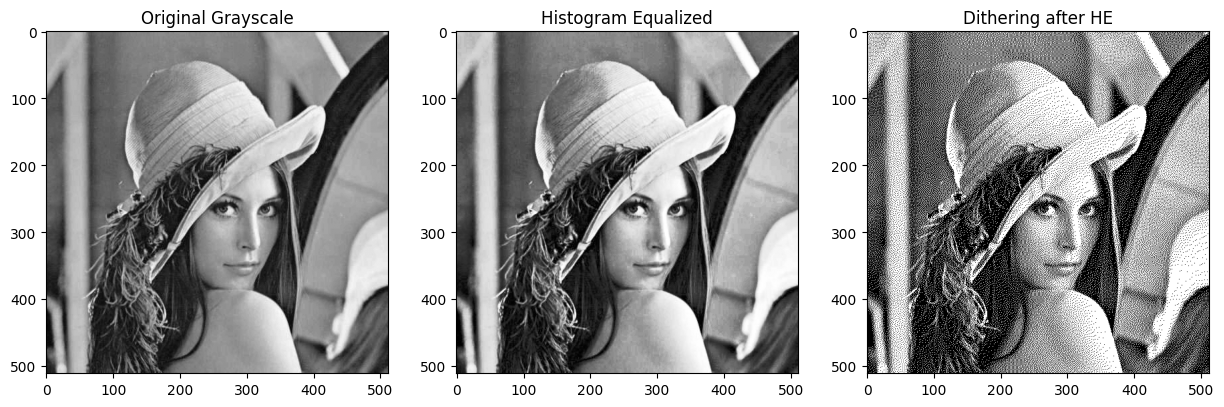

In [21]:
#2
# Load image lena_lc
img_lc = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
gray_lc = cv.cvtColor(img_lc, cv.COLOR_BGR2GRAY)

# Histogram Equalization
equalized = cv.equalizeHist(gray_lc)

# Terapkan dithering setelah equalization
dithered_eq = floyd_steinberg_dithering(equalized)

# Tampilkan hasil
plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(gray_lc, cmap="gray"), plt.title("Original Grayscale")
plt.subplot(1,3,2), plt.imshow(equalized, cmap="gray"), plt.title("Histogram Equalized")
plt.subplot(1,3,3), plt.imshow(dithered_eq, cmap="gray"), plt.title("Dithering after HE")
plt.show()